# The perceptron

## Theory and history of the perceptron

Frank Rosenblatt proposed the 'perceptron' algorithm as a way to formalize several ideas about knowledge representation and cognition in the mid 20th century (Rossenblatt, 1958). He wanted to approach to fundamental questions: 

* In what form is information stored or remembered? 
* How does the information contained in storage, or in memory, influence recognition and behavior?

According to Rossenblat, there were two distinct approaches to answer such questions: the **code theorist** and the **empiricist/connectionist theorist**. Code theorist proposed that sensory information is in the form of *coded representations* or images, with some sort of one to one mapping between the sensory stimulus and the stored pattern. On the other hand, empiricist/connectionist theorist, inspired by how biological systems actually work, proposed that the central nervous system acts as an intricate *switching network*, where information takes the form of new connections or pathways between centers of activity. In other words, accoding to empiricist/connectionist theorist, there is no simple one-to-one mapping from stimulus into memory, i.e., *the information or knowledge is contained in the connections or associations between neurons*, rather than as static blueprints to be compared with incoming sensory stimulus. 

Rosenblatt, inspired by the work of empiricist/connectionist theorist like Hebb, Hayek, and others, wanted to express these ideas more formally and rigorously in order to be tested computationally. Some key ideas guiding Rosenblatt reasoning where: 

* The physical connections in the brain involved in learning and recognition vary from organism to organism
* Plasticity is a key feature of the nervous system, such that changes in response to experience
* Rewards and punishments can increase or decrease the probability of certain connections reacting to similar stimulus

Therefore, information is understood as a dynamic ever-changing pattern of connectivity among neurons in the brain, which are subject to the influence of experience and the environment of the organism. As such, no two brains are the same, and the way in which your brain and may brain storage information about the same fact, may be completely different. 

The perceptron (or the ‘photoperceptron’ in the case of vision) is a formal mathematical manifestation of these ideas. In essence, a **single-layer perceptron** is a system that: 

* Takes and input through the sensory sensory system (e.g., the retina)
* Combines the values of the inputs with the weights of the connections between the neurons
* Produce an output in an all-or-nothing fashion belonging to a class of objects (mathematically, as a step-function). 

Next, we formally define a perceptron and implement the algorithm in code. 

Ref: 
- Rosenblatt, F. (1958). The perceptron: a probabilistic model for information storage and organization in the brain. Psychological review, 65(6), 386.



## Formal definition of the perceptron algorithm

Mathematically, the perceptron is a simple **linear classifier** defined by two formulas
* a **decision or threshold function**
* a **training or learning rule**

![alt text](https://github.com/pabloinsente/comp_models_cog_beh/blob/master/figures/images/perceptron_flow.png "Single-layer perceptron")


### Decision function

The **decision or threshold function** for the perceptron is defined as:  


$$  f(z) =
\begin{cases}
 1,  & \text{if $\boldsymbol w \cdot \boldsymbol x + b$ > 0} \\
-1, & \text{otherwise}
\end{cases}
$$

where:  
- ${z}$ is a vector of reald-valued features  
- $w$ is a vector of real-valued weights  
- $w \cdot x$ is a inner product   
- $b$ is the bias term  

Note about the bias term: the we add a bias term to allow the model to adjust the intercept of the line on the plane. Otherwise, the line would be forced to go through the origin in the cartesian plane (in the 2-Dimensional case). 

To compute the **net-input** for the decision function, we need to compute the inner product (or dot product) of the feature vector and the weigths vector. The inner product is defined as: 

\begin{equation*}
\sum_{k=1}^n w_k x_k = w_0 x_0 + w_1 x_1 + ... + w_n x_n
\end{equation*}


### Learning rule

The perceptron learning rule is simple: compute the mistmatch between the **predicted value** for a given exemplar and the **actual value**, and then use such delta to update the value the weights vector. This is defined as:

\begin{equation*}
w_k = w_k + \Delta w_k
\end{equation*}

The $\Delta w_k$ is computed as:

\begin{equation*}
\Delta w_k = \eta(y^i - \hat{y}^i)x^i_k
\end{equation*}

where:
- $\eta$ is the learning rate (0 -1 value)
- $y^i$ is the actual value ("true class")
- $\hat{y}^i$ is the predicted value ("predicted class")
- $x^i_k$ is the feature vector for case $k$

Note about the learning rate $\eta$: the learning rate has the role of facilitating the training process by weighting the delta used to update the weights. This basically means that instead of completely replacing the previous weight with the sum of the weight + delta, we incorporate a **proportion** of the error into the updating process. This makes the learning process more stable and smooth. 

## Perceptron algorithm implementation

We will implement the perceptron algorithm from scrath with Python and Numpy (a Python package for scientific computing). The goal is to understand the perceptron step-by-step execution rather than achieving an elegant implementation. I'll break down each step into functions to ensemble everything at the end. 

The scikit-learn implementation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). In general, we don't want to re-implemented algorithms that has been thouroughly tested by others, to avoid duplication of work an potential bugs in our code. 


### Generate random weights vector

In [2]:
import numpy as np

def random_weights(X, random_state: int):
    '''create vector of random weights'''
    rand = np.random.RandomState(random_state)
    w = rand.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    return w

Predictions from the percetron are obtained by a linear combination of features and weights. It is common practice to begin with a vector of small random weights that would be updated later by the perceptron learning rule.

### Compute net input

In [3]:
def net_input(X, w):
    '''Compute net input as dot product'''
    return np.dot(X, w[1:]) + w[0]

Here we pass the featue matrix and the previously generated vector of random weights to compute the inner product. Remember that we need to add an extra weight for the bias term at the begining of the vector (`w[0`)

### Compute predictions

In [4]:
def predict(X, w):
    '''Return class label after unit step'''
    return np.where(net_input(X, w) >= 0.0, 1, -1)

This method implements the **threshold function** which takes the net-value of the inner product and outputs a 1 if the predicted value is >= 0, and -1 otherwise. 

### Training loop - Learning rule

In [5]:
def fit(X, y, eta=0.01, n_iter=50):
    '''loop over exemplars and update weights'''
    errors = []
    w = random_weights(X, random_state=1)
    for exemplar in range(n_iter):
        error = 0
        for xi, target in zip(X, y):
            delta = eta * (target - predict(xi, w))
            w[1:] += delta * xi
            w[0] += delta
            error += int(delta != 0.0)
        errors.append(error)
    return w, errors

Let's examine the fit method that implements the learning rule: 
* Create a vector of random weights by using the `random_weights` function with dimensionality equal to the number of columns in the feature matrix.
* Loop over each row of the feature matrix with `for exemplar in range(n_iter)`
* Compute the inner product between the feature vector for row $i$ and the weight vector by using the `predict(xi, w)` function
* Compute the difference between the predicted value and the target value times the learning rate with `delta = eta * (target - predict(xi, w))`
* Update the weights by `w[1:] += delta * xi` and `w[0] += delta`
* We also save the errors for further plotting `errors.append(error)`

## Testing the perceptron

Next, we will test the implementation by creating a minimal example with only 4 cases (rows) and 3 features (columns). The association between features and targets is extremely simple and obvious: cases with high values predict '1' (positive class) and cases with low values predict '-1' (negative class). 

In [15]:
# create matrix of features
X = np.array([[11, 21, 33],
              [1, 2, 3],
              [12, 24, 37],
              [1, 2, 3]])

# create targets
y = np.array([1, -1, 1, -1])

# fit and predict values
w, errors = fit(X, y)
y_pred = predict(X, w)
print(f'vector of weights: {w}')
print(f'errors at each time step: {errors}')
print(f'predicted value for each case: {y_pred}')

vector of weights: [-0.38375655  0.01388244  0.01471828  0.06927031]
errors at each time step: [3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
predicted value for each case: [ 1 -1  1 -1]


By printing the prediction error ar each time step we can see that the perceptron predicts each case correctly after 12 training cicles. Let's plot the errors to complement the analysis.

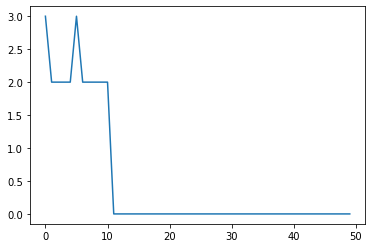

In [12]:
import matplotlib.pyplot as plt 

def plot_errors(errors):
    step = np.arange(0, len(errors))
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(step, errors)
    return plt.show()

plot_errors(errors)